# SOURCE EXTRACTION (MOVIE API)

In [3]:
import pandas as pd
import requests
import json
import os
import time
from new_config import TMDB_API_KEY

Testing with one Movie to see if the API is working

In [4]:
base_url = "https://api.themoviedb.org/3"
movie_id = 299534
url = f"{base_url}/movie/{movie_id}?api_key={TMDB_API_KEY}"
response = requests.get(url)

# Check if the request was successful
print(f"Response status code: {response.status_code}")

movie_data = response.json()

# Display the movie data
print(json.dumps(movie_data, indent = 2))

Response status code: 200
{
  "adult": false,
  "backdrop_path": "/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg",
  "belongs_to_collection": {
    "id": 86311,
    "name": "The Avengers Collection",
    "poster_path": "/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg",
    "backdrop_path": "/zuW6fOiusv4X9nnW3paHGfXcSll.jpg"
  },
  "budget": 356000000,
  "genres": [
    {
      "id": 12,
      "name": "Adventure"
    },
    {
      "id": 878,
      "name": "Science Fiction"
    },
    {
      "id": 28,
      "name": "Action"
    }
  ],
  "homepage": "https://www.marvel.com/movies/avengers-endgame",
  "id": 299534,
  "imdb_id": "tt4154796",
  "origin_country": [
    "US"
  ],
  "original_language": "en",
  "original_title": "Avengers: Endgame",
  "overview": "After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the unive

Loading the movies into our container to panderize them 😂


In [5]:
# List of movie ID
movie_ids = movie_id = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]

# Base URL for TMDB API
base_url = "https://api.themoviedb.org/3"

# List to store all movie data
all_movie_data = []

# Loop through each movie ID and fetch data
for movie_id in movie_ids:
    print(f"Fetching data for movie ID: {movie_id}..")
    
    # Build Complete URL 
    url = f"{base_url}/movie/{movie_id}?api_key={TMDB_API_KEY}"
    
    # Make GET request to fetch movie data
   
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        movie_data = response.json()
        all_movie_data.append(movie_data)  # Add to list
        print(f"Successfully fetched data for movie_ID: {movie_id}")
    else: 
        print(f"x Error code {response.status_code} for movie_ID: {movie_id}")
    
    time.sleep(0.25)  # Sleep to avoid hitting rate limits
    
    print (f" Successfully fetched data for {len(all_movie_data)} out of {len(movie_ids)} movies.")
    print (f"Unsuccessful fetch attempts: {len(movie_ids) - len(all_movie_data)}")
    

Fetching data for movie ID: 0..
x Error code 404 for movie_ID: 0
 Successfully fetched data for 0 out of 19 movies.
Unsuccessful fetch attempts: 19
Fetching data for movie ID: 299534..
Successfully fetched data for movie_ID: 299534
 Successfully fetched data for 1 out of 19 movies.
Unsuccessful fetch attempts: 18
Fetching data for movie ID: 19995..
Successfully fetched data for movie_ID: 19995
 Successfully fetched data for 2 out of 19 movies.
Unsuccessful fetch attempts: 17
Fetching data for movie ID: 140607..
Successfully fetched data for movie_ID: 140607
 Successfully fetched data for 3 out of 19 movies.
Unsuccessful fetch attempts: 16
Fetching data for movie ID: 299536..
Successfully fetched data for movie_ID: 299536
 Successfully fetched data for 4 out of 19 movies.
Unsuccessful fetch attempts: 15
Fetching data for movie ID: 597..
Successfully fetched data for movie_ID: 597
 Successfully fetched data for 5 out of 19 movies.
Unsuccessful fetch attempts: 14
Fetching data for movie I

In [6]:
movie_data_raw = pd.DataFrame(all_movie_data)
print(movie_data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  18 non-null     bool   
 1   backdrop_path          18 non-null     object 
 2   belongs_to_collection  16 non-null     object 
 3   budget                 18 non-null     int64  
 4   genres                 18 non-null     object 
 5   homepage               18 non-null     object 
 6   id                     18 non-null     int64  
 7   imdb_id                18 non-null     object 
 8   origin_country         18 non-null     object 
 9   original_language      18 non-null     object 
 10  original_title         18 non-null     object 
 11  overview               18 non-null     object 
 12  popularity             18 non-null     float64
 13  poster_path            18 non-null     object 
 14  production_companies   18 non-null     object 
 15  producti

Data Cleaning and Preprocessing

In [7]:
movie_data_clean = movie_data_raw.drop(columns=['original_title', 'adult', 'imdb_id', 'video', 'homepage'])

In [8]:
print(movie_data_clean['title'].head())

0               Avengers: Endgame
1                          Avatar
2    Star Wars: The Force Awakens
3          Avengers: Infinity War
4                         Titanic
Name: title, dtype: object


In [9]:
print("Available columns:", movie_data_clean.columns.tolist())
print (len(movie_data_clean.columns))

Available columns: ['backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'id', 'origin_country', 'original_language', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']
21


In [10]:
print(movie_data_clean['spoken_languages'])

0     [{'english_name': 'English', 'iso_639_1': 'en'...
1     [{'english_name': 'English', 'iso_639_1': 'en'...
2     [{'english_name': 'English', 'iso_639_1': 'en'...
3     [{'english_name': 'English', 'iso_639_1': 'en'...
4     [{'english_name': 'English', 'iso_639_1': 'en'...
5     [{'english_name': 'English', 'iso_639_1': 'en'...
6     [{'english_name': 'English', 'iso_639_1': 'en'...
7     [{'english_name': 'English', 'iso_639_1': 'en'...
8     [{'english_name': 'Arabic', 'iso_639_1': 'ar',...
9     [{'english_name': 'English', 'iso_639_1': 'en'...
10    [{'english_name': 'English', 'iso_639_1': 'en'...
11    [{'english_name': 'English', 'iso_639_1': 'en'...
12    [{'english_name': 'English', 'iso_639_1': 'en'...
13    [{'english_name': 'English', 'iso_639_1': 'en'...
14    [{'english_name': 'English', 'iso_639_1': 'en'...
15    [{'english_name': 'English', 'iso_639_1': 'en'...
16    [{'english_name': 'English', 'iso_639_1': 'en'...
17    [{'english_name': 'English', 'iso_639_1': 

In [11]:
json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

print ("Examining JSON columns:", json_columns)

for col in json_columns:
    print(f"\n{col.upper()}:")
    
    # Select a  sample row to examine
    sample = movie_data_clean[col].dropna().iloc[0] if movie_data_clean[col].notna().any() else None
    
    if sample: 
        print(f"Sample type: {type(sample)}")
        print(f"Sample data : {sample}")
    else:
        print("No data available in this column.")


Examining JSON columns: ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

BELONGS_TO_COLLECTION:
Sample type: <class 'dict'>
Sample data : {'id': 86311, 'name': 'The Avengers Collection', 'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg', 'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'}

GENRES:
Sample type: <class 'list'>
Sample data : [{'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}]

PRODUCTION_COMPANIES:
Sample type: <class 'list'>
Sample data : [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZxCGEKTXaQ.png', 'name': 'Marvel Studios', 'origin_country': 'US'}]

PRODUCTION_COUNTRIES:
Sample type: <class 'list'>
Sample data : [{'iso_3166_1': 'US', 'name': 'United States of America'}]

SPOKEN_LANGUAGES:
Sample type: <class 'list'>
Sample data : [{'english_name': 'English', 'iso_639_1': 'en', 'name': 'English'}, {'english_name': 'Japanese', 'iso_639_1': 'ja', 'name': '日本語'}, {'e

In [12]:
# Taking a look at a sample movie's JSON columns
sample_movies = all_movie_data[1] # Using index 1 (skip 0 if it failed)

print ("RAW DATA STRUCTURE FOR JSON COLUMNS")
print ("=" * 60)

print("\n1. BELONGS TO COLLECTION:")
print(sample_movies.get('belongs_to_collection'))

print("\n2. GENRES:")
print(sample_movies.get('genres'))

print("\n3. PRODUCTION COMPANIES:")
print(sample_movies.get('production_companies'))

print("\n4. PRODUCTION COUNTRIES:")
print(sample_movies.get('production_countries'))

print("\n5. SPOKEN LANGUAGES:")
print(sample_movies.get('spoken_languages'))


RAW DATA STRUCTURE FOR JSON COLUMNS

1. BELONGS TO COLLECTION:
{'id': 87096, 'name': 'Avatar Collection', 'poster_path': '/3C5brXxnBxfkeKWwA1Fh4xvy4wr.jpg', 'backdrop_path': '/6qkJLRCZp9Y3ovXti5tSuhH0DpO.jpg'}

2. GENRES:
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]

3. PRODUCTION COMPANIES:
[{'id': 444, 'logo_path': None, 'name': 'Dune Entertainment', 'origin_country': 'US'}, {'id': 574, 'logo_path': '/8wdmrfGcDx3TJxYiiDksLzAW4pB.png', 'name': 'Lightstorm Entertainment', 'origin_country': 'US'}, {'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVRBLzaVmcp.png', 'name': '20th Century Fox', 'origin_country': 'US'}, {'id': 133789, 'logo_path': '/bJdeIb1ET3BkyodAASVDq1x3mls.png', 'name': 'Ingenious Film Partners', 'origin_country': 'GB'}]

4. PRODUCTION COUNTRIES:
[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

5. SPOKEN LANGUAGES:
[{'english_name'

Function to exctract and transform JSON columns

In [13]:

def extract_collection_name(collection_data):
    """
    Extract collection for names in the belongs_to_collection field
    Input: {'id': 87096, 'name': 'Avatar Collection', ...} or None
    Output: 'Avatar Collection' or None
    
    """
    if collection_data and isinstance(collection_data, dict):
        return collection_data.get('name')
    return None

# def extract_names_pipe_separated(json_list):
#     """
#     Extract names from a list of JSON objects and join them with pipe separator
#     Input: [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]
#     Output: 'Action|Adventure'
#     """
#     if not json_list or not isinstance(json_list, list):
#         return None
    
#     # Extract all 'name' values
#     names = [item.get('name') for item in json_list if 'name' in item]
    
#     # Join names with pipe separator
#     return '|'.join(names) if names else None

# FIXED extraction function
def extract_names_pipe_separated(data_list):
    if not data_list or not isinstance(data_list, list):
        return None
    
    # Filter out empty/blank names
    names = [
        item.get('name').strip()  # Also strip whitespace
        for item in data_list 
        if 'name' in item and item.get('name') and item.get('name').strip()
    ]
    
    return '|'.join(names) if names else None

# Test the functions
print("Testing the extraction functions:")

print("=" * 60)

test_movie = all_movie_data[1]  # Using index 1 (skip 0 if it failed)

print(f'\nOriginal collection: {test_movie.get("belongs_to_collection")}')
print(f'Extracted collection name: {extract_collection_name(test_movie.get("belongs_to_collection"))}')

print(f'\nOriginal genres: {test_movie.get("genres")}')
print(f'Extracted genres: {extract_names_pipe_separated(test_movie.get("genres"))}')

print(f'\nOriginal production_companies: {test_movie.get("production_companies")}')
print(f'Extracted production companies: {extract_names_pipe_separated(test_movie.get("production_companies"))}')

Testing the extraction functions:

Original collection: {'id': 87096, 'name': 'Avatar Collection', 'poster_path': '/3C5brXxnBxfkeKWwA1Fh4xvy4wr.jpg', 'backdrop_path': '/6qkJLRCZp9Y3ovXti5tSuhH0DpO.jpg'}
Extracted collection name: Avatar Collection

Original genres: [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]
Extracted genres: Action|Adventure|Fantasy|Science Fiction

Original production_companies: [{'id': 444, 'logo_path': None, 'name': 'Dune Entertainment', 'origin_country': 'US'}, {'id': 574, 'logo_path': '/8wdmrfGcDx3TJxYiiDksLzAW4pB.png', 'name': 'Lightstorm Entertainment', 'origin_country': 'US'}, {'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVRBLzaVmcp.png', 'name': '20th Century Fox', 'origin_country': 'US'}, {'id': 133789, 'logo_path': '/bJdeIb1ET3BkyodAASVDq1x3mls.png', 'name': 'Ingenious Film Partners', 'origin_country': 'GB'}]
Extracted production companies: Dune Entertainment|Lightstorm 

In [14]:
# Apply to all movies in the DataFrame
movies_df_clean = pd.DataFrame([
    {
        'id': movie['id'],
        'title': movie['title'],
        'tagline': movie.get('tagline'),  # NEW
        'overview': movie.get('overview'),  # NEW
        'status': movie.get('status'),  # NEW
        'release_date': movie['release_date'],
        'runtime': movie['runtime'],
        'budget': movie['budget'],
        'revenue': movie['revenue'],
        'vote_average': movie['vote_average'],
        'vote_count': movie['vote_count'],
        'popularity': movie['popularity'],
        'original_language': movie['original_language'],
        'poster_path': movie.get('poster_path'),  # NEW
        'collection': extract_collection_name(movie.get('belongs_to_collection')),
        'genres': extract_names_pipe_separated(movie.get('genres')),
        'spoken_languages': extract_names_pipe_separated(movie.get('spoken_languages')),
        'production_countries': extract_names_pipe_separated(movie.get('production_countries')),
        'production_companies': extract_names_pipe_separated(movie.get('production_companies')),
    }
    for movie in all_movie_data
])

# Display the cleaned DataFrame 
print("\n" + "="*60)
print("CLEANED DATAFRAME WITH EXTRACTED FIELDS")
print("="*60)
print(movies_df_clean)

print("\n" + "="*60)
print("SAMPLE EXTRACTED DATA")
print("="*60)
print("\nFirst 5 movies - extracted fields only:")
print(movies_df_clean[['title', 'collection', 'genres', 'spoken_languages', 'production_countries', 'production_companies']].head())


CLEANED DATAFRAME WITH EXTRACTED FIELDS
        id                                         title  \
0   299534                             Avengers: Endgame   
1    19995                                        Avatar   
2   140607                  Star Wars: The Force Awakens   
3   299536                        Avengers: Infinity War   
4      597                                       Titanic   
5   135397                                Jurassic World   
6   420818                                 The Lion King   
7    24428                                  The Avengers   
8   168259                                     Furious 7   
9    99861                       Avengers: Age of Ultron   
10  284054                                 Black Panther   
11   12445  Harry Potter and the Deathly Hallows: Part 2   
12  181808                      Star Wars: The Last Jedi   
13  330457                                     Frozen II   
14  351286                Jurassic World: Fallen Kingdom   

Inspect with value_counts() to Identify anomalies

In [15]:
# Step 3: Inspect with value_counts()
print("\n" + "="*70)
print("VALUE_COUNTS INSPECTION")
print("="*70)

# Collection
print("\n1. COLLECTION:")
print(movies_df_clean['collection'].value_counts(dropna=False))

# Genres (split by pipe)
print("\n2. GENRES (individual):")
print(movies_df_clean['genres'].str.split('|').explode().value_counts())

# Languages (split by pipe)
print("\n3. SPOKEN LANGUAGES (individual):")
print(movies_df_clean['spoken_languages'].str.split('|').explode().value_counts())

# Countries (split by pipe)
print("\n4. PRODUCTION COUNTRIES (individual):")
print(movies_df_clean['production_countries'].str.split('|').explode().value_counts())

# Companies (top 15)
print("\n5. PRODUCTION COMPANIES (top 15):")
print(movies_df_clean['production_companies'].str.split('|').explode().value_counts().head(15))

# Anomaly summary
print("\n" + "="*70)
print("ANOMALY DETECTION")
print("="*70)
print("\nMissing data:")
print(movies_df_clean[['collection', 'genres', 'spoken_languages', 
                        'production_countries', 'production_companies']].isnull().sum())





VALUE_COUNTS INSPECTION

1. COLLECTION:
collection
The Avengers Collection                4
Star Wars Collection                   2
None                                   2
Frozen Collection                      2
Jurassic Park Collection               2
Avatar Collection                      1
The Lion King (Reboot) Collection      1
The Fast and the Furious Collection    1
Black Panther Collection               1
Harry Potter Collection                1
The Incredibles Collection             1
Name: count, dtype: int64

2. GENRES (individual):
genres
Adventure          15
Action             12
Science Fiction    10
Fantasy             5
Family              5
Animation           4
Thriller            3
Romance             2
Drama               2
Crime               1
Comedy              1
Name: count, dtype: int64

3. SPOKEN LANGUAGES (individual):
spoken_languages
English      18
Pусский       3
Español       2
Français      2
日本語           1
Deutsch       1
svenska       1
Italian

Handling Missing and Incorrect Data

In [16]:
movies_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18 non-null     int64  
 1   title                 18 non-null     object 
 2   tagline               18 non-null     object 
 3   overview              18 non-null     object 
 4   status                18 non-null     object 
 5   release_date          18 non-null     object 
 6   runtime               18 non-null     int64  
 7   budget                18 non-null     int64  
 8   revenue               18 non-null     int64  
 9   vote_average          18 non-null     float64
 10  vote_count            18 non-null     int64  
 11  popularity            18 non-null     float64
 12  original_language     18 non-null     object 
 13  poster_path           18 non-null     object 
 14  collection            16 non-null     object 
 15  genres                18 

AI Generated Summary report on identified trends 
## Analysis Summary: TMDb Movie Dataset (18 Movies)

---

### **Key Findings:**

**1. Franchise Dominance**
- **78% of movies belong to franchises** (14 out of 18 movies are part of collections)
- **The Avengers Collection leads** with 4 movies, followed by Star Wars, Frozen, and Jurassic Park (2 each)
- Only 2 standalone films in this dataset
- **Insight:** This sample is heavily skewed toward franchise/sequel content, indicating either blockbuster bias or intentional selection of major film series

**2. Genre Distribution**
- **Adventure (15), Action (12), and Science Fiction (10)** dominate
- Strong presence of **Family-friendly content** (Animation: 4, Family: 5, Fantasy: 5)
- **Underrepresented genres:** Drama (2), Comedy (1), Crime (1) - mature/adult-oriented content is minimal
- **Insight:** Dataset reflects commercial blockbuster trends - high-action, family-friendly films that generate franchise potential

**3. Language & Geographic Concentration**
- **100% U.S. production dominance** (18 out of 18 movies produced in the United States)
- **English is primary language** (18 occurrences), but many films are multilingual
- **Notable multilingual support:** Russian (3), French (2), Spanish (2), plus Asian languages (Japanese, Korean, Thai, Hindi)
- **Insight:** Hollywood global strategy evident - U.S.-produced films with international language tracks for worldwide distribution

**4. Studio Concentration**
- **Marvel Studios dominates** (5 movies - 28% of dataset)
- **Disney ecosystem prevalent:** Marvel, Walt Disney Animation, Walt Disney Pictures, Lucasfilm, 20th Century Fox (Disney-owned)
- Universal Pictures (3) is the main non-Disney competitor
- **Insight:** Extreme studio consolidation - Disney-affiliated companies account for majority of this sample

**5. Data Quality**
- **Excellent completeness:** Only 2 missing collection values (expected for standalone films)
- **Zero missing data** for genres, languages, countries, and companies
- **Clean extraction:** Pipe-separated format successfully implemented
- **Potential concern:** The 3 blank entries in spoken_languages may indicate data entry issues or need investigation

---

### **Anomalies Detected:**

1. **Geographic Monopoly:** 100% U.S. production is unusual even for blockbusters - suggests sampling bias toward Hollywood tentpoles
2. **Genre Homogeneity:** Lack of diversity (no horror, limited drama/comedy) indicates commercial/family-friendly filtering
3. **Mystery blank language entries:** 3 instances of empty strings need investigation - may be parsing errors
4. **Studio concentration risk:** Heavy Marvel/Disney presence may skew financial and franchise analysis

---

### **Implications for Your Analysis:**

- ✅ **Franchise Analysis:** Excellent dataset - clear franchise vs. standalone comparison possible
- ✅ **Financial Metrics:** Blockbuster budgets/revenues expected - good for ROI analysis
- ⚠️ **Genre Diversity:** Limited - conclusions may not generalize to independent/arthouse films
- ⚠️ **Geographic Representation:** U.S.-only production limits international film industry insights
- ✅ **Director Analysis:** (Coming next) Marvel/Disney directors will likely dominate

**Recommendation:** Acknowledge sampling bias toward major studio franchises when drawing conclusions. This represents "blockbuster cinema" trends, not the film industry as a whole.


In [17]:
movies_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18 non-null     int64  
 1   title                 18 non-null     object 
 2   tagline               18 non-null     object 
 3   overview              18 non-null     object 
 4   status                18 non-null     object 
 5   release_date          18 non-null     object 
 6   runtime               18 non-null     int64  
 7   budget                18 non-null     int64  
 8   revenue               18 non-null     int64  
 9   vote_average          18 non-null     float64
 10  vote_count            18 non-null     int64  
 11  popularity            18 non-null     float64
 12  original_language     18 non-null     object 
 13  poster_path           18 non-null     object 
 14  collection            16 non-null     object 
 15  genres                18 

Converting column types

In [18]:
print("\nConverting numeric columns")
numeric_columns = ['id', 'runtime', 'budget', 'revenue', 'vote_average', 'vote_count', 'popularity', ]

for col in numeric_columns:
    movies_df_clean[col] = pd.to_numeric(movies_df_clean[col], errors='coerce')
    print(f"Converted column '{col}' to numeric type.")


Converting numeric columns
Converted column 'id' to numeric type.
Converted column 'runtime' to numeric type.
Converted column 'budget' to numeric type.
Converted column 'revenue' to numeric type.
Converted column 'vote_average' to numeric type.
Converted column 'vote_count' to numeric type.
Converted column 'popularity' to numeric type.


In [19]:
print("\nConverting release_date to datetime")
movies_df_clean['release_date'] = pd.to_datetime(movies_df_clean['release_date'], errors = 'coerce')
print("Converted release_date to datetime type.")

print("\nVerifying data type conversions:")
print(movies_df_clean.dtypes)

print("\nSamples of converted data:")
print(movies_df_clean[['title','budget', 'release_date', 'popularity']].head())


Converting release_date to datetime
Converted release_date to datetime type.

Verifying data type conversions:
id                               int64
title                           object
tagline                         object
overview                        object
status                          object
release_date            datetime64[ns]
runtime                          int64
budget                           int64
revenue                          int64
vote_average                   float64
vote_count                       int64
popularity                     float64
original_language               object
poster_path                     object
collection                      object
genres                          object
spoken_languages                object
production_countries            object
production_companies            object
dtype: object

Samples of converted data:
                          title     budget release_date  popularity
0             Avengers: Endgame  3560

Replace Unrealistic Values

In [20]:
# Replacing 0 values for budget, revenue, runtime with NaN
print("\nReplacing zero values with NaN...")
zero_replacement_columns = ['budget', 'revenue', 'runtime']

for col in zero_replacement_columns:
    zero_count = (movies_df_clean[col] == 0).sum()
    movies_df_clean[col] = movies_df_clean[col].replace(0,pd.NA)
    print(f"Replaced {zero_count} zero values in column '{col}' with NaN.")
    
# Convert Budget and Runtime to million USD
print("\nConverting 'budget' and 'revenue' to million USD...")
movies_df_clean['budget_musd'] = movies_df_clean['budget'] / 1_000_000
movies_df_clean['revenue_musd'] = movies_df_clean['revenue'] / 1_000_000
print(movies_df_clean[['budget_musd', 'revenue_musd']].head())
print("\nConversion to million USD completed.")

# Drop original budget and revenue columns
movies_df_clean = movies_df_clean.drop(columns=['budget', 'revenue'])



Replacing zero values with NaN...
Replaced 0 zero values in column 'budget' with NaN.
Replaced 0 zero values in column 'revenue' with NaN.
Replaced 0 zero values in column 'runtime' with NaN.

Converting 'budget' and 'revenue' to million USD...
   budget_musd  revenue_musd
0        356.0   2799.439100
1        237.0   2923.706026
2        245.0   2068.223624
3        300.0   2052.415039
4        200.0   2264.162353

Conversion to million USD completed.


In [21]:
print("\nAnalysing movies with vote_count == 0...")
vote_count_zero = movies_df_clean[movies_df_clean['vote_count'] == 0]
print(f"Number of movies with vote_count == 0: {len(vote_count_zero)}")

if len(vote_count_zero) > 0:
    print("These movies: ")
    print(vote_count_zero[['title', 'vote_count', 'vote_average']])
    
    # Set vote_average to NaN for these movies
    movies_df_clean.loc[movies_df_clean['vote_count'] == 0, 'vote_average'] = pd.NA
    print("Set vote_average to NaN for movies with 0 vote_count")


Analysing movies with vote_count == 0...
Number of movies with vote_count == 0: 0


In [22]:
print("\nReplacing Unknown Placeholders test with NaN")
placeholder_cols = ['overview', 'tagline']
placeholder_replacements = ['No Data', 'N/A', 'Unknown', 'None', 'n/a', '', ' ']

for col in placeholder_cols: 
    if col in movies_df_clean.columns:
        # Replacing whitespaces and empty strings
        movies_df_clean[col] = movies_df_clean[col].replace('', pd.NA)
        movies_df_clean[col] = movies_df_clean[col].str.strip()
        movies_df_clean[col] = movies_df_clean[col].replace('', pd.NA)
        
        # Replace known placeholders
        for placeholder in placeholder_replacements:
            mask = movies_df_clean[col].str.lower() == placeholder.lower()
            movies_df_clean.loc[mask, col] = pd.NA
        
        print(f"  ✓ Cleaned {col}")
        
print("\nData after unrealistic value replacement:")
print(movies_df_clean[['title', 'budget_musd', 'revenue_musd', 'runtime', 'vote_count', 'vote_average']].head(10))
print(movies_df_clean[movies_df_clean[['overview', 'tagline']].isin(placeholder_replacements).any(axis=1)])


Replacing Unknown Placeholders test with NaN
  ✓ Cleaned overview
  ✓ Cleaned tagline

Data after unrealistic value replacement:
                          title  budget_musd  revenue_musd  runtime  \
0             Avengers: Endgame        356.0   2799.439100      181   
1                        Avatar        237.0   2923.706026      162   
2  Star Wars: The Force Awakens        245.0   2068.223624      136   
3        Avengers: Infinity War        300.0   2052.415039      149   
4                       Titanic        200.0   2264.162353      194   
5                Jurassic World        150.0   1671.537444      124   
6                 The Lion King        260.0   1662.020819      118   
7                  The Avengers        220.0   1518.815515      143   
8                     Furious 7        190.0   1515.400000      139   
9       Avengers: Age of Ultron        235.0   1405.403694      141   

   vote_count  vote_average  
0       26972         8.237  
1       32870         7.594 

Removing Duplicates and Drop Invalid Rows

In [23]:
# Checking for duplicates
print(f"\nRows before duplicate removal: {len(movies_df_clean)}")
duplicates = movies_df_clean.duplicated(subset=['id'], keep='first').sum()
print(f"No. of duplicate rows found: {duplicates}")

# Remove duplicate based on ID first
movies_df_clean = movies_df_clean.drop_duplicates(subset=['id'], keep='first')
print(f"Rows after duplicate removal: {len(movies_df_clean)}")

# Drop Rows based on missing id or title
before_drop = len(movies_df_clean)
print(f"\nRows before dropping missing id/title: {before_drop}")
movies_df_clean = movies_df_clean.dropna(subset=['id', 'title'])
after_drop = len(movies_df_clean)
print(f"Rows after dropping missing id/title: {after_drop}")
print(f"Dropped {before_drop - after_drop} rows with missing id/title.")



Rows before duplicate removal: 18
No. of duplicate rows found: 0
Rows after duplicate removal: 18

Rows before dropping missing id/title: 18
Rows after dropping missing id/title: 18
Dropped 0 rows with missing id/title.


Keeping Rows with Only Sufficient Data

In [24]:
print("\nFilter Rows by completeness")

# Count non-nan values per row
non_nan_counts = movies_df_clean.notna().sum(axis=1)

print("\nDistribution of non-NaN values per row:")
print(non_nan_counts.value_counts().sort_index())

# Keep rows with at least 10 non-NaN columns
print("\nFiltering: Keeping rows with at least 10 non-NaN values...")
before_filter = len(movies_df_clean)
movies_df_clean = movies_df_clean[non_nan_counts >= 10]
after_filter = len(movies_df_clean)

print(f"Rows before filtering: {before_filter}")
print(f"Rows after filtering: {after_filter}")
print(f"Dropped {before_filter - after_filter} rows with insufficient data.")


Filter Rows by completeness

Distribution of non-NaN values per row:
18     2
19    16
Name: count, dtype: int64

Filtering: Keeping rows with at least 10 non-NaN values...
Rows before filtering: 18
Rows after filtering: 18
Dropped 0 rows with insufficient data.


Filter For Released Movies

In [25]:
print("\nStatus value counts: ")
if 'status' in movies_df_clean.columns:
    print(movies_df_clean['status'].value_counts())

    # Filter for Released movies only
    before_filter = len(movies_df_clean)
    movies_df_clean = movies_df_clean[movies_df_clean['status'] == 'Released']
    after_filter = len(movies_df_clean)

    print(f"\n Movies before filter: {before_filter}")
    print(f" Movies after filter: {after_filter}")
    print(f"Removed: {before_filter - after_filter}")

    # Drop Status Column
    movies_df_clean = movies_df_clean.drop(columns=['status'], axis= 1)
    print("Dropped 'Status' column.")
else: 
    print(" 'status' column not found - skipping this step.")


Status value counts: 
status
Released    18
Name: count, dtype: int64

 Movies before filter: 18
 Movies after filter: 18
Removed: 0
Dropped 'Status' column.


Getting Cast and Director Data 

In [26]:
def fetch_credits(movie_id):
    """Fetch cast and crew data for a movie from TMDB API
    """
    url = f"{base_url}/movie/{movie_id}/credits?api_key={TMDB_API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    return None

def extract_director(crew_data):
    """Extract director's name from the crew list
    """
    if not crew_data:
        return None
    
    directors = [person['name'] for person in crew_data if person.get('job') == 'Director']
    return directors[0] if directors else None

def extract_cast_names(cast_list, limit=5):
    """Extract top N cast member names"""
    if not cast_list:
        return None
    
    cast_names = [person['name'] for person in cast_list[:limit]]
    return '|'.join(cast_names) if cast_names else None


# Fetch credits for all movies
print("\nFetching credits for all movies...")
credits_data = []

for idx, row in movies_df_clean.iterrows():
    movie_id = row['id']
    print(f"  Fetching credits for: {row['title']}...")
    
    credits = fetch_credits(int(movie_id))
    
    if credits:
        director = extract_director(credits.get('crew', []))
        cast = extract_cast_names(credits.get('cast', []), limit=5)
        cast_size = len(credits.get('cast', []))
        crew_size = len(credits.get('crew', []))
        
        credits_data.append({
            'id': movie_id,
            'director': director,
            'cast': cast,
            'cast_size': cast_size,
            'crew_size': crew_size
        })
    
    time.sleep(0.1)  # time lag for API rate limits

# Create credits DataFrame and merge
credits_df = pd.DataFrame(credits_data)
movies_df_clean = movies_df_clean.merge(credits_df, on='id', how='left')

print("\n✓ Credits data added!")
print(movies_df_clean[['title', 'director', 'cast', 'cast_size']].head())

        


Fetching credits for all movies...
  Fetching credits for: Avengers: Endgame...
  Fetching credits for: Avatar...
  Fetching credits for: Star Wars: The Force Awakens...
  Fetching credits for: Avengers: Infinity War...
  Fetching credits for: Titanic...
  Fetching credits for: Jurassic World...
  Fetching credits for: The Lion King...
  Fetching credits for: The Avengers...
  Fetching credits for: Furious 7...
  Fetching credits for: Avengers: Age of Ultron...
  Fetching credits for: Black Panther...
  Fetching credits for: Harry Potter and the Deathly Hallows: Part 2...
  Fetching credits for: Star Wars: The Last Jedi...
  Fetching credits for: Frozen II...
  Fetching credits for: Jurassic World: Fallen Kingdom...
  Fetching credits for: Frozen...
  Fetching credits for: Beauty and the Beast...
  Fetching credits for: Incredibles 2...

✓ Credits data added!
                          title       director  \
0             Avengers: Endgame  Anthony Russo   
1                        Av

Reorder Columns and Reset Index

In [27]:
print(movies_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    18 non-null     int64         
 1   title                 18 non-null     object        
 2   tagline               18 non-null     object        
 3   overview              18 non-null     object        
 4   release_date          18 non-null     datetime64[ns]
 5   runtime               18 non-null     int64         
 6   vote_average          18 non-null     float64       
 7   vote_count            18 non-null     int64         
 8   popularity            18 non-null     float64       
 9   original_language     18 non-null     object        
 10  poster_path           18 non-null     object        
 11  collection            16 non-null     object        
 12  genres                18 non-null     object        
 13  spoken_languages      

In [28]:
print("\nReordering columns and Resetting index...")
desired_column_order = [
    'id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 
    'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 
    'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size'
    ]

# Rename 'collection' back to 'belongs_to_collection'
if 'collection' in movies_df_clean.columns: 
    movies_df_clean = movies_df_clean.rename(columns={'collection': 'belongs_to_collection'})
    
# Keep only desired columns that exist
existing_columns = [col for col in desired_column_order if col in movies_df_clean.columns]
missing_columns = [col for col in desired_column_order if col not in movies_df_clean.columns]

if missing_columns: 
    print(f"\n Missing columns: {missing_columns}")
    
# Reorder columns
movies_df_final = movies_df_clean[existing_columns].copy().reset_index(drop=True)

print("\n FINAL CLEANED DATAFRAME")
print(f"Shape: {movies_df_final.shape}")
print(f"Columns: {list(movies_df_final.columns)}")
print("\nFirst few rows:")
print(movies_df_final.head())

print("\n\nData types:")
print(movies_df_final.dtypes)

# Just to be sure
print("\n\nMissing values:")
print(movies_df_final.isnull().sum())


Reordering columns and Resetting index...

 FINAL CLEANED DATAFRAME
Shape: (18, 22)
Columns: ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']

First few rows:
       id                         title  \
0  299534             Avengers: Endgame   
1   19995                        Avatar   
2  140607  Star Wars: The Force Awakens   
3  299536        Avengers: Infinity War   
4     597                       Titanic   

                                     tagline release_date  \
0                         Avenge the fallen.   2019-04-24   
1                Enter the world of Pandora.   2009-12-15   
2              Every generation has a story.   2015-12-15   
3              Destiny arrives all the same.   2018-04-25   

# KPI Implementation and Analysis
Identify Best/Worst Performing Movies

In [31]:
import numpy as np
# Create a copy to work with 
movies_kpi = movies_df_final.copy()

# Calculate Profit ( Revenue - Budget )
print("\n1. Calculating Profit...")
movies_kpi["profit_musd"] = movies_kpi['revenue_musd'] - movies_kpi['budget_musd']
print(f"Profit calculated for {movies_kpi['profit_musd'].notna().sum()} movies")

# Calculate ROI ( Return on Investment)
print("\n2. Calculating ROI (Return on Investment)...")
# ROI = Profit / Budget
# Only for movies with a budget >= 10 million (Realistic ROI)
movies_kpi['roi'] = np.where(
    movies_kpi['budget_musd'] >= 10, # Condition
    movies_kpi['profit_musd'] / movies_kpi['budget_musd'], # If True
    np.nan # If false (budget < 10M) set to NaN
)
print(f" ROI calculated for {movies_kpi['roi'].notna().sum()}movies with a budget greater than $10 million")

# Sample Calculation Results
print("\n3. Sample KPI Calculations:")
print(movies_kpi[['title', 'budget_musd', 'revenue_musd', 'profit_musd', 'roi']].head(10))


1. Calculating Profit...
Profit calculated for 18 movies

2. Calculating ROI (Return on Investment)...
 ROI calculated for 18movies with a budget greater than $10 million

3. Sample KPI Calculations:
                          title  budget_musd  revenue_musd  profit_musd  \
0             Avengers: Endgame        356.0   2799.439100  2443.439100   
1                        Avatar        237.0   2923.706026  2686.706026   
2  Star Wars: The Force Awakens        245.0   2068.223624  1823.223624   
3        Avengers: Infinity War        300.0   2052.415039  1752.415039   
4                       Titanic        200.0   2264.162353  2064.162353   
5                Jurassic World        150.0   1671.537444  1521.537444   
6                 The Lion King        260.0   1662.020819  1402.020819   
7                  The Avengers        220.0   1518.815515  1298.815515   
8                     Furious 7        190.0   1515.400000  1325.400000   
9       Avengers: Age of Ultron        235.0   14

Why filter ROI by budget >= $10M?

Analogy: If you invest $1 and make $100, that's 10,000% ROI - sounds great! But it's not comparable to a $100M investment making $200M (100% ROI). We filter out small budgets to avoid misleading comparisons.

In [32]:
# Ranking 
def rank_movies(df, metric, ascending=False, top_n=10, min_votes=None, min_budget=None):
    """
    Rank movies by a specific metric with optional filters
    
    Parameters:
    ------------
    df: Dataframe 
        The movies Dataframe
    metric: str
        Column name to rank by (e.g., 'revenue_musd, 'roi')
    ascending: bool
        True for lowest first (worst), False for highest first (best)
    top_n: int
        Number of top results to return
    min_votes: int, optional
        Minimum vote_count required (for rating-based rankings)
    min_budget: float optional
        Minimum budget_musd required (for ROI rankings)
        
    Returns:
    ---------
    Dataframe with Ranked movies
    """
    
    # Create a copy
    filtered_df = df.copy()
    
    # Apply filters
    if min_votes is not None:
        filtered_df = filtered_df[filtered_df['vote_count']>=min_votes]
        print(f"Filtered to {len(filtered_df)} movies with >= {min_votes} votes")
        
    if min_budget is not None:
        filtered_df = filtered_df[filtered_df['budget_musd']>=min_budget]
        print(f"Filtered to {len(filtered_df)} movies with budget >= {min_budget} M")
        
    # Remove rows where metric is NaN
    filtered_df = filtered_df.dropna(subset=[metric])
    
    # Sort by metric
    ranked = filtered_df.sort_values(by=metric, ascending=ascending)
    
    # Showing relevant columns
    display_cols = ['title', 'release_date', 'budget_musd', 'revenue_musd', 
                    'profit_musd', 'roi', 'vote_average', 'vote_count', 
                    'popularity', 'director']
    
    display_cols = [col for col in display_cols if col in ranked.columns]
    
    return ranked[display_cols].head(top_n)    

In [33]:
# Testing the Function 
print("\n" + "="*70)
print("TESTING RANKING FUNCTION")
print("="*70)

print("\n Top 5 Highest Revenue Movies:")
print(rank_movies(movies_kpi, 'revenue_musd', ascending=False, top_n=5))




TESTING RANKING FUNCTION

 Top 5 Highest Revenue Movies:
                          title release_date  budget_musd  revenue_musd  \
1                        Avatar   2009-12-15        237.0   2923.706026   
0             Avengers: Endgame   2019-04-24        356.0   2799.439100   
4                       Titanic   1997-11-18        200.0   2264.162353   
2  Star Wars: The Force Awakens   2015-12-15        245.0   2068.223624   
3        Avengers: Infinity War   2018-04-25        300.0   2052.415039   

   profit_musd        roi  vote_average  vote_count  popularity       director  
1  2686.706026  11.336312         7.594       32870     32.1020  James Cameron  
0  2443.439100   6.863593         8.237       26972     14.3290  Anthony Russo  
4  2064.162353  10.320812         7.903       26518     26.9381  James Cameron  
2  1823.223624   7.441729         7.300       20104      7.1475    J.J. Abrams  
3  1752.415039   5.841383         8.235       31184     20.3123      Joe Russo  


Analogy for the function is to have one major recipe for the different ingredients (parameters) that needed to be tested

In [34]:
print("\n" + "="*70)
print("MOVIE RANKINGS - BEST & WORST PERFORMERS")
print("="*70)

# 1. HIGHEST REVENUE
print("\n" + "="*70)
print("1. HIGHEST REVENUE MOVIES")
print("="*70)
highest_revenue = rank_movies(movies_kpi, 'revenue_musd', ascending=False, top_n=10)
print(highest_revenue[['title', 'revenue_musd', 'director']])

# 2. HIGHEST BUDGET
print("\n" + "="*70)
print("2. HIGHEST BUDGET MOVIES")
print("="*70)
highest_budget = rank_movies(movies_kpi, 'budget_musd', ascending=False, top_n=10)
print(highest_budget[['title', 'budget_musd', 'director']])

# 3. HIGHEST PROFIT
print("\n" + "="*70)
print("3. HIGHEST PROFIT MOVIES (Revenue - Budget)")
print("="*70)
highest_profit = rank_movies(movies_kpi, 'profit_musd', ascending=False, top_n=10)
print(highest_profit[['title', 'profit_musd', 'budget_musd', 'revenue_musd']])

# 4. LOWEST PROFIT (Biggest Flops)
print("\n" + "="*70)
print("4. LOWEST PROFIT MOVIES (Biggest Flops)")
print("="*70)
lowest_profit = rank_movies(movies_kpi, 'profit_musd', ascending=True, top_n=10)
print(lowest_profit[['title', 'profit_musd', 'budget_musd', 'revenue_musd']])

# 5. HIGHEST ROI (Best Investment)
print("\n" + "="*70)
print("5. HIGHEST ROI MOVIES (Budget >= $10M)")
print("="*70)
print("ROI = Profit / Budget (e.g., ROI of 2.0 = $2 earned per $1 spent)")
highest_roi = rank_movies(movies_kpi, 'roi', ascending=False, top_n=10, min_budget=10)
print(highest_roi[['title', 'roi', 'budget_musd', 'revenue_musd']])

# 6. LOWEST ROI (Worst Investment)
print("\n" + "="*70)
print("6. LOWEST ROI MOVIES (Budget >= $10M)")
print("="*70)
lowest_roi = rank_movies(movies_kpi, 'roi', ascending=True, top_n=10, min_budget=10)
print(lowest_roi[['title', 'roi', 'budget_musd', 'revenue_musd']])

# 7. MOST VOTED MOVIES
print("\n" + "="*70)
print("7. MOST VOTED MOVIES")
print("="*70)
most_voted = rank_movies(movies_kpi, 'vote_count', ascending=False, top_n=10)
print(most_voted[['title', 'vote_count', 'vote_average']])

# 8. HIGHEST RATED MOVIES (min 10 votes)
print("\n" + "="*70)
print("8. HIGHEST RATED MOVIES (Minimum 10 votes)")
print("="*70)
highest_rated = rank_movies(movies_kpi, 'vote_average', ascending=False, top_n=10, min_votes=10)
print(highest_rated[['title', 'vote_average', 'vote_count']])

# 9. LOWEST RATED MOVIES (min 10 votes)
print("\n" + "="*70)
print("9. LOWEST RATED MOVIES (Minimum 10 votes)")
print("="*70)
lowest_rated = rank_movies(movies_kpi, 'vote_average', ascending=True, top_n=10, min_votes=10)
print(lowest_rated[['title', 'vote_average', 'vote_count']])

# 10. MOST POPULAR MOVIES
print("\n" + "="*70)
print("10. MOST POPULAR MOVIES")
print("="*70)
most_popular = rank_movies(movies_kpi, 'popularity', ascending=False, top_n=10)
print(most_popular[['title', 'popularity', 'vote_average']])


MOVIE RANKINGS - BEST & WORST PERFORMERS

1. HIGHEST REVENUE MOVIES
                           title  revenue_musd         director
1                         Avatar   2923.706026    James Cameron
0              Avengers: Endgame   2799.439100    Anthony Russo
4                        Titanic   2264.162353    James Cameron
2   Star Wars: The Force Awakens   2068.223624      J.J. Abrams
3         Avengers: Infinity War   2052.415039        Joe Russo
5                 Jurassic World   1671.537444  Colin Trevorrow
6                  The Lion King   1662.020819      Jon Favreau
7                   The Avengers   1518.815515      Joss Whedon
8                      Furious 7   1515.400000        James Wan
13                     Frozen II   1453.683476     Jennifer Lee

2. HIGHEST BUDGET MOVIES
                           title  budget_musd       director
0              Avengers: Endgame        356.0  Anthony Russo
3         Avengers: Infinity War        300.0      Joe Russo
12      Star Wars:

In [37]:
print("\n" + "="*70)
print("FRANCHISE VS. STANDALONE MOVIE PERFORMANCE")
print("="*70)

# Create franchise indicator
movies_kpi['is_franchise'] = movies_kpi['belongs_to_collection'].notna()

# Label for display
movies_kpi['movie_type'] = movies_kpi['is_franchise'].map({
    True: 'Franchise',
    False: 'Standalone'
})

# Group by movie type and calculate metrics
franchise_comparison = movies_kpi.groupby('movie_type').agg({
    'revenue_musd': ['mean', 'median', 'count'],
    'budget_musd': 'mean',
    'roi': 'median',
    'popularity': 'mean',
    'vote_average': 'mean'
}).round(2)

# Flatten column names
franchise_comparison.columns = ['_'.join(col).strip() for col in franchise_comparison.columns]

# Rename for clarity
franchise_comparison = franchise_comparison.rename(columns={
    'revenue_musd_mean': 'Mean Revenue (M USD)',
    'revenue_musd_median': 'Median Revenue (M USD)',
    'revenue_musd_count': 'Number of Movies',
    'budget_musd_mean': 'Mean Budget (M USD)',
    'roi_median': 'Median ROI',
    'popularity_mean': 'Mean Popularity',
    'vote_average_mean': 'Mean Rating'
})

print("\n📊 FRANCHISE VS. STANDALONE COMPARISON")
print(franchise_comparison)

# Calculate percentage differences
if len(franchise_comparison) == 2:
    franchise_row = franchise_comparison.loc['Franchise']
    standalone_row = franchise_comparison.loc['Standalone']
    
    print("\n" + "="*70)
    print("INSIGHTS:")
    print("="*70)
    
    revenue_diff = ((franchise_row['Mean Revenue (M USD)'] - standalone_row['Mean Revenue (M USD)']) 
                    / standalone_row['Mean Revenue (M USD)'] * 100)
    print(f"• Franchise movies earn {revenue_diff:.1f}% more revenue on average")
    
    budget_diff = ((franchise_row['Mean Budget (M USD)'] - standalone_row['Mean Budget (M USD)']) 
                   / standalone_row['Mean Budget (M USD)'] * 100)
    print(f"• Franchise movies have {budget_diff:.1f}% higher budgets on average")
    
    roi_diff = ((franchise_row['Median ROI'] - standalone_row['Median ROI']) 
                / standalone_row['Median ROI'] * 100)
    print(f"• Franchise movies have {roi_diff:.1f}% {'better' if roi_diff > 0 else 'worse'} median ROI")

# Show individual franchise movies vs standalone
print("\n" + "="*70)
print("DETAILED BREAKDOWN:")
print("="*70)
print("\nFranchise Movies:")
print(movies_kpi[movies_kpi['is_franchise']][['title', 'belongs_to_collection', 'revenue_musd', 'roi']])

print("\nStandalone Movies:")
print(movies_kpi[~movies_kpi['is_franchise']][['title', 'revenue_musd', 'roi']])


FRANCHISE VS. STANDALONE MOVIE PERFORMANCE

📊 FRANCHISE VS. STANDALONE COMPARISON
            Mean Revenue (M USD)  Median Revenue (M USD)  Number of Movies  \
movie_type                                                                   
Franchise                1682.67                 1484.54                16   
Standalone               1765.14                 1765.14                 2   

            Mean Budget (M USD)  Median ROI  Mean Popularity  Mean Rating  
movie_type                                                                 
Franchise                 218.0        6.79            15.72         7.39  
Standalone                180.0        8.62            19.03         7.44  

INSIGHTS:
• Franchise movies earn -4.7% more revenue on average
• Franchise movies have 21.1% higher budgets on average
• Franchise movies have -21.2% worse median ROI

DETAILED BREAKDOWN:

Franchise Movies:
                                           title  \
0                              Avengers

In [38]:
print("\n" + "="*70)
print("MOST SUCCESSFUL MOVIE FRANCHISES")
print("="*70)

# Filter only franchise movies
franchise_movies = movies_kpi[movies_kpi['belongs_to_collection'].notna()].copy()

# Group by collection
franchise_analysis = franchise_movies.groupby('belongs_to_collection').agg({
    'title': 'count',  # Number of movies
    'budget_musd': ['sum', 'mean'],
    'revenue_musd': ['sum', 'mean'],
    'vote_average': 'mean',
    'roi': 'mean'
}).round(2)

# Flatten column names
franchise_analysis.columns = ['_'.join(col).strip() for col in franchise_analysis.columns]

# Rename columns
franchise_analysis = franchise_analysis.rename(columns={
    'title_count': 'Number of Movies',
    'budget_musd_sum': 'Total Budget (M USD)',
    'budget_musd_mean': 'Mean Budget (M USD)',
    'revenue_musd_sum': 'Total Revenue (M USD)',
    'revenue_musd_mean': 'Mean Revenue (M USD)',
    'vote_average_mean': 'Mean Rating',
    'roi_mean': 'Mean ROI'
})

# Sort by total revenue (most successful)
franchise_analysis = franchise_analysis.sort_values('Total Revenue (M USD)', ascending=False)

print("\n📊 FRANCHISE PERFORMANCE METRICS")
print(franchise_analysis)

# Highlight top franchise
top_franchise = franchise_analysis.index[0]
top_revenue = franchise_analysis.iloc[0]['Total Revenue (M USD)']
top_count = franchise_analysis.iloc[0]['Number of Movies']

print("\n" + "="*70)
print("🏆 TOP FRANCHISE:")
print("="*70)
print(f"Franchise: {top_franchise}")
print(f"Total Revenue: ${top_revenue:,.2f} Million")
print(f"Number of Movies: {int(top_count)}")
print(f"Average Revenue per Movie: ${top_revenue/top_count:,.2f} Million")


MOST SUCCESSFUL MOVIE FRANCHISES

📊 FRANCHISE PERFORMANCE METRICS
                                     Number of Movies  Total Budget (M USD)  \
belongs_to_collection                                                         
The Avengers Collection                             4                1111.0   
Star Wars Collection                                2                 545.0   
Jurassic Park Collection                            2                 320.0   
Avatar Collection                                   1                 237.0   
Frozen Collection                                   2                 300.0   
The Lion King (Reboot) Collection                   1                 260.0   
The Fast and the Furious Collection                 1                 190.0   
Black Panther Collection                            1                 200.0   
Harry Potter Collection                             1                 125.0   
The Incredibles Collection                          1           

In [39]:
print("\n" + "="*70)
print("MOST SUCCESSFUL DIRECTORS")
print("="*70)

# Filter movies with director data
director_movies = movies_kpi[movies_kpi['director'].notna()].copy()

# Group by director
director_analysis = director_movies.groupby('director').agg({
    'title': 'count',  # Number of movies directed
    'revenue_musd': ['sum', 'mean'],
    'budget_musd': 'mean',
    'vote_average': 'mean',
    'roi': 'mean'
}).round(2)

# Flatten column names
director_analysis.columns = ['_'.join(col).strip() for col in director_analysis.columns]

# Rename columns
director_analysis = director_analysis.rename(columns={
    'title_count': 'Number of Movies',
    'revenue_musd_sum': 'Total Revenue (M USD)',
    'revenue_musd_mean': 'Mean Revenue per Movie (M USD)',
    'budget_musd_mean': 'Mean Budget (M USD)',
    'vote_average_mean': 'Mean Rating',
    'roi_mean': 'Mean ROI'
})

# Sort by total revenue
director_analysis = director_analysis.sort_values('Total Revenue (M USD)', ascending=False)

print("\n📊 DIRECTOR PERFORMANCE METRICS")
print(director_analysis)

# Highlight top director
if len(director_analysis) > 0:
    top_director = director_analysis.index[0]
    top_director_revenue = director_analysis.iloc[0]['Total Revenue (M USD)']
    top_director_count = director_analysis.iloc[0]['Number of Movies']
    top_director_rating = director_analysis.iloc[0]['Mean Rating']
    
    print("\n" + "="*70)
    print("🎬 TOP DIRECTOR:")
    print("="*70)
    print(f"Director: {top_director}")
    print(f"Total Revenue: ${top_director_revenue:,.2f} Million")
    print(f"Number of Movies: {int(top_director_count)}")
    print(f"Average Revenue per Movie: ${top_director_revenue/top_director_count:,.2f} Million")
    print(f"Average Rating: {top_director_rating:.2f}/10")


MOST SUCCESSFUL DIRECTORS

📊 DIRECTOR PERFORMANCE METRICS
                 Number of Movies  Total Revenue (M USD)  \
director                                                   
James Cameron                   2                5187.87   
Joss Whedon                     2                2924.22   
Anthony Russo                   1                2799.44   
Jennifer Lee                    2                2727.90   
J.J. Abrams                     1                2068.22   
Joe Russo                       1                2052.42   
Colin Trevorrow                 1                1671.54   
Jon Favreau                     1                1662.02   
James Wan                       1                1515.40   
Ryan Coogler                    1                1349.93   
David Yates                     1                1341.51   
Rian Johnson                    1                1332.70   
J.A. Bayona                     1                1310.47   
Bill Condon                     1        

# Data Visualization

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*70)
print("STEP 4: DATA VISUALIZATION")
print("="*70)

STEP 4: DATA VISUALIZATION


 Revenue vs. Budget Trends


VISUALIZATION 1: REVENUE VS. BUDGET TRENDS
✓ Saved: revenue_vs_budget.png


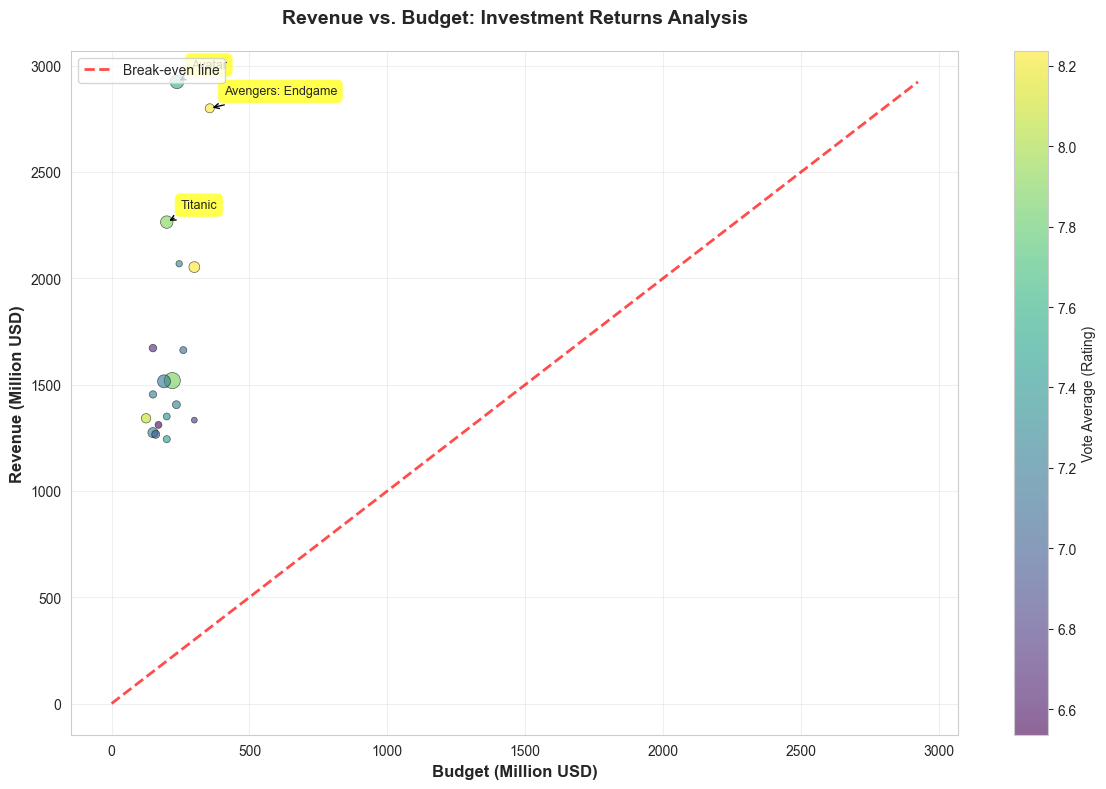


📊 INSIGHTS:
• 18/18 movies (100.0%) are profitable (above break-even line)
• Movies above the line made more than they cost
• Bigger bubbles = more popular movies
• Color intensity = higher ratings (yellow = better)


In [44]:
print("\n" + "="*70)
print("VISUALIZATION 1: REVENUE VS. BUDGET TRENDS")
print("="*70)

# Create figure with subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot
scatter = ax.scatter(
    movies_kpi['budget_musd'], 
    movies_kpi['revenue_musd'],
    c=movies_kpi['vote_average'],  # Color by rating
    s=movies_kpi['popularity'] * 3,  # Size by popularity
    alpha=0.6,
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

# Add a diagonal line (break-even line where revenue = budget)
max_val = max(movies_kpi['budget_musd'].max(), movies_kpi['revenue_musd'].max())
ax.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Break-even line', alpha=0.7)

# Labels and title
ax.set_xlabel('Budget (Million USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue (Million USD)', fontsize=12, fontweight='bold')
ax.set_title('Revenue vs. Budget: Investment Returns Analysis', 
             fontsize=14, fontweight='bold', pad=20)

# Add colorbar for ratings
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Vote Average (Rating)', fontsize=10)

# Add legend
ax.legend(loc='upper left', fontsize=10)

# Add grid
ax.grid(True, alpha=0.3)

# Annotate outliers (top 3 revenue movies)
top_3_revenue = movies_kpi.nlargest(3, 'revenue_musd')
for idx, row in top_3_revenue.iterrows():
    ax.annotate(
        row['title'], 
        xy=(row['budget_musd'], row['revenue_musd']),
        xytext=(10, 10), 
        textcoords='offset points',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black')
    )

plt.tight_layout()
plt.savefig('revenue_vs_budget.png', dpi=300, bbox_inches='tight')
print("✓ Saved: revenue_vs_budget.png")
plt.show()

# Print insights
print("\n📊 INSIGHTS:")
above_line = (movies_kpi['revenue_musd'] > movies_kpi['budget_musd']).sum()
total = len(movies_kpi.dropna(subset=['revenue_musd', 'budget_musd']))
print(f"• {above_line}/{total} movies ({above_line/total*100:.1f}%) are profitable (above break-even line)")
print(f"• Movies above the line made more than they cost")
print(f"• Bigger bubbles = more popular movies")
print(f"• Color intensity = higher ratings (yellow = better)")

ROI Distribution by Genre


VISUALIZATION 2: ROI DISTRIBUTION BY GENRE


C:\Users\Carl\AppData\Local\Temp\ipykernel_22548\3563793022.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Carl\AppData\Local\Temp\ipykernel_22548\3563793022.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


✓ Saved: roi_by_genre.png


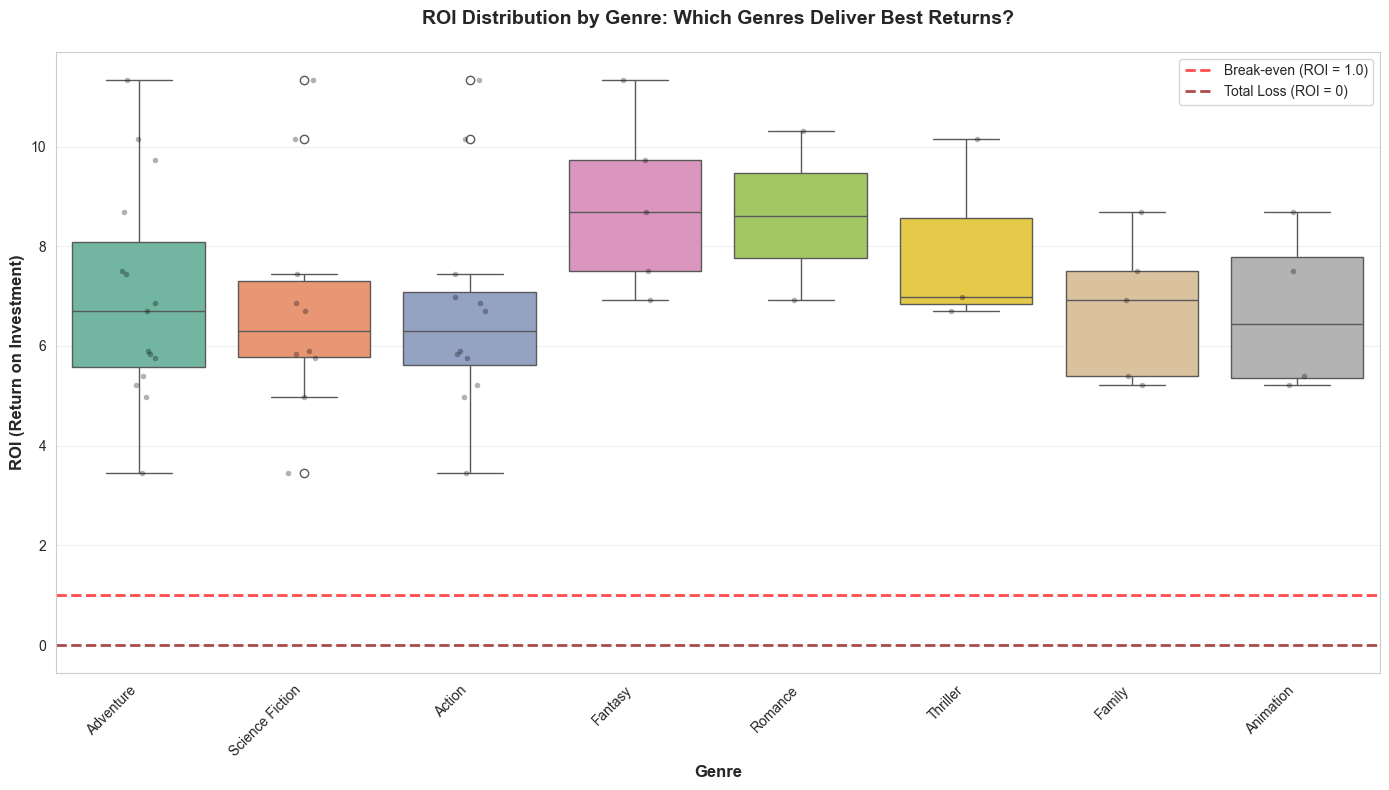


📊 INSIGHTS:

Genre ROI Statistics (sorted by mean):
                 mean  median  count
genres_list                         
Fantasy          8.83    8.69      5
Romance          8.62    8.62      2
Thriller         7.94    6.98      3
Adventure        7.00    6.71     15
Science Fiction  6.84    6.31     10
Family           6.74    6.91      5
Action           6.72    6.31     12
Animation        6.70    6.44      4

🏆 Best performing genre: Fantasy (Mean ROI: 8.83)
   This means for every $1 spent, you earn $8.83 back


In [45]:
print("\n" + "="*70)
print("VISUALIZATION 2: ROI DISTRIBUTION BY GENRE")
print("="*70)

# Prepare data: explode genres (split pipe-separated values)
genre_roi_data = movies_kpi[movies_kpi['roi'].notna()].copy()
genre_roi_data['genres_list'] = genre_roi_data['genres'].str.split('|')

# Explode genres into separate rows
genre_roi_exploded = genre_roi_data.explode('genres_list')

# Remove any whitespace
genre_roi_exploded['genres_list'] = genre_roi_exploded['genres_list'].str.strip()

# Create box plot
fig, ax = plt.subplots(figsize=(14, 8))

# Get top genres by count
top_genres = genre_roi_exploded['genres_list'].value_counts().head(8).index

# Filter to top genres only
genre_roi_top = genre_roi_exploded[genre_roi_exploded['genres_list'].isin(top_genres)]

# Create box plot
sns.boxplot(
    data=genre_roi_top,
    x='genres_list',
    y='roi',
    palette='Set2',
    ax=ax
)

# Overlay individual points
sns.stripplot(
    data=genre_roi_top,
    x='genres_list',
    y='roi',
    color='black',
    alpha=0.3,
    size=4,
    ax=ax
)

# Labels and title
ax.set_xlabel('Genre', fontsize=12, fontweight='bold')
ax.set_ylabel('ROI (Return on Investment)', fontsize=12, fontweight='bold')
ax.set_title('ROI Distribution by Genre: Which Genres Deliver Best Returns?', 
             fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add horizontal line at ROI = 1 (break-even)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Break-even (ROI = 1.0)', alpha=0.7)

# Add horizontal line at ROI = 0 (total loss)
ax.axhline(y=0, color='darkred', linestyle='--', linewidth=2, label='Total Loss (ROI = 0)', alpha=0.7)

ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('roi_by_genre.png', dpi=300, bbox_inches='tight')
print("✓ Saved: roi_by_genre.png")
plt.show()

# Print insights
print("\n📊 INSIGHTS:")
genre_roi_stats = genre_roi_top.groupby('genres_list')['roi'].agg(['mean', 'median', 'count']).round(2)
genre_roi_stats = genre_roi_stats.sort_values('mean', ascending=False)
print("\nGenre ROI Statistics (sorted by mean):")
print(genre_roi_stats)

best_genre = genre_roi_stats.index[0]
best_roi = genre_roi_stats.iloc[0]['mean']
print(f"\n🏆 Best performing genre: {best_genre} (Mean ROI: {best_roi:.2f})")
print(f"   This means for every $1 spent, you earn ${best_roi:.2f} back")

Popularity vs. Rating


VISUALIZATION 3: POPULARITY VS. RATING
✓ Saved: popularity_vs_rating.png


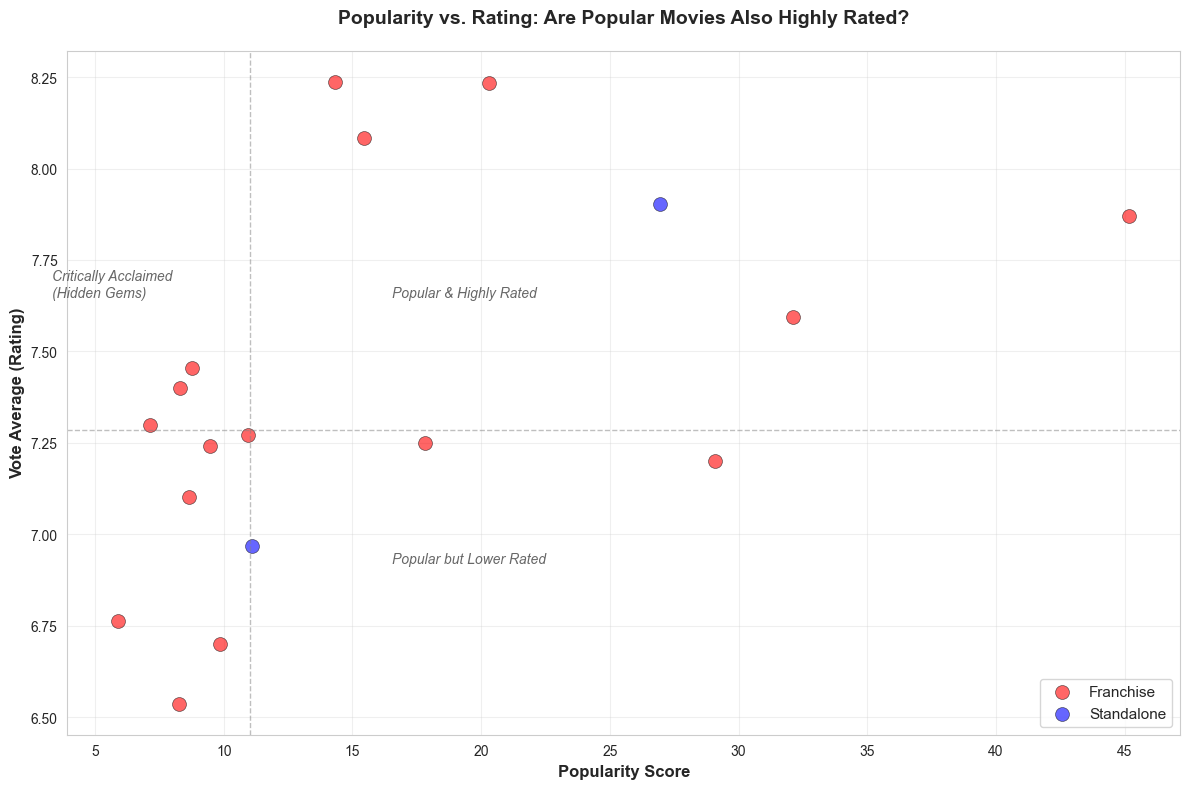


📊 INSIGHTS:
• Correlation between Popularity and Rating: 0.485
  → Moderate positive correlation: Some relationship exists
• 6 movies are both popular AND highly rated (top-right quadrant)


In [46]:
print("\n" + "="*70)
print("VISUALIZATION 3: POPULARITY VS. RATING")
print("="*70)

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot with franchise color coding
colors = movies_kpi['is_franchise'].map({True: 'red', False: 'blue'})

for franchise_status in [True, False]:
    subset = movies_kpi[movies_kpi['is_franchise'] == franchise_status]
    label = 'Franchise' if franchise_status else 'Standalone'
    color = 'red' if franchise_status else 'blue'
    
    ax.scatter(
        subset['popularity'],
        subset['vote_average'],
        c=color,
        s=100,
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5,
        label=label
    )

# Labels and title
ax.set_xlabel('Popularity Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Vote Average (Rating)', fontsize=12, fontweight='bold')
ax.set_title('Popularity vs. Rating: Are Popular Movies Also Highly Rated?', 
             fontsize=14, fontweight='bold', pad=20)

# Add reference lines
median_rating = movies_kpi['vote_average'].median()
median_popularity = movies_kpi['popularity'].median()

ax.axhline(y=median_rating, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=median_popularity, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Add quadrant labels
ax.text(median_popularity * 1.5, median_rating * 1.05, 'Popular & Highly Rated', 
        fontsize=10, style='italic', alpha=0.7)
ax.text(median_popularity * 0.3, median_rating * 1.05, 'Critically Acclaimed\n(Hidden Gems)', 
        fontsize=10, style='italic', alpha=0.7)
ax.text(median_popularity * 1.5, median_rating * 0.95, 'Popular but Lower Rated', 
        fontsize=10, style='italic', alpha=0.7)

ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('popularity_vs_rating.png', dpi=300, bbox_inches='tight')
print("✓ Saved: popularity_vs_rating.png")
plt.show()

# Calculate correlation
correlation = movies_kpi[['popularity', 'vote_average']].corr().iloc[0, 1]
print(f"\n📊 INSIGHTS:")
print(f"• Correlation between Popularity and Rating: {correlation:.3f}")
if correlation > 0.5:
    print("  → Strong positive correlation: Popular movies tend to be highly rated")
elif correlation > 0.3:
    print("  → Moderate positive correlation: Some relationship exists")
else:
    print("  → Weak correlation: Popularity and quality are independent")

# Quadrant analysis
high_pop_high_rate = ((movies_kpi['popularity'] > median_popularity) & 
                       (movies_kpi['vote_average'] > median_rating)).sum()
print(f"• {high_pop_high_rate} movies are both popular AND highly rated (top-right quadrant)")

Yearly Trends in Box Office Performance


VISUALIZATION 4: YEARLY TRENDS IN BOX OFFICE PERFORMANCE
✓ Saved: yearly_trends.png


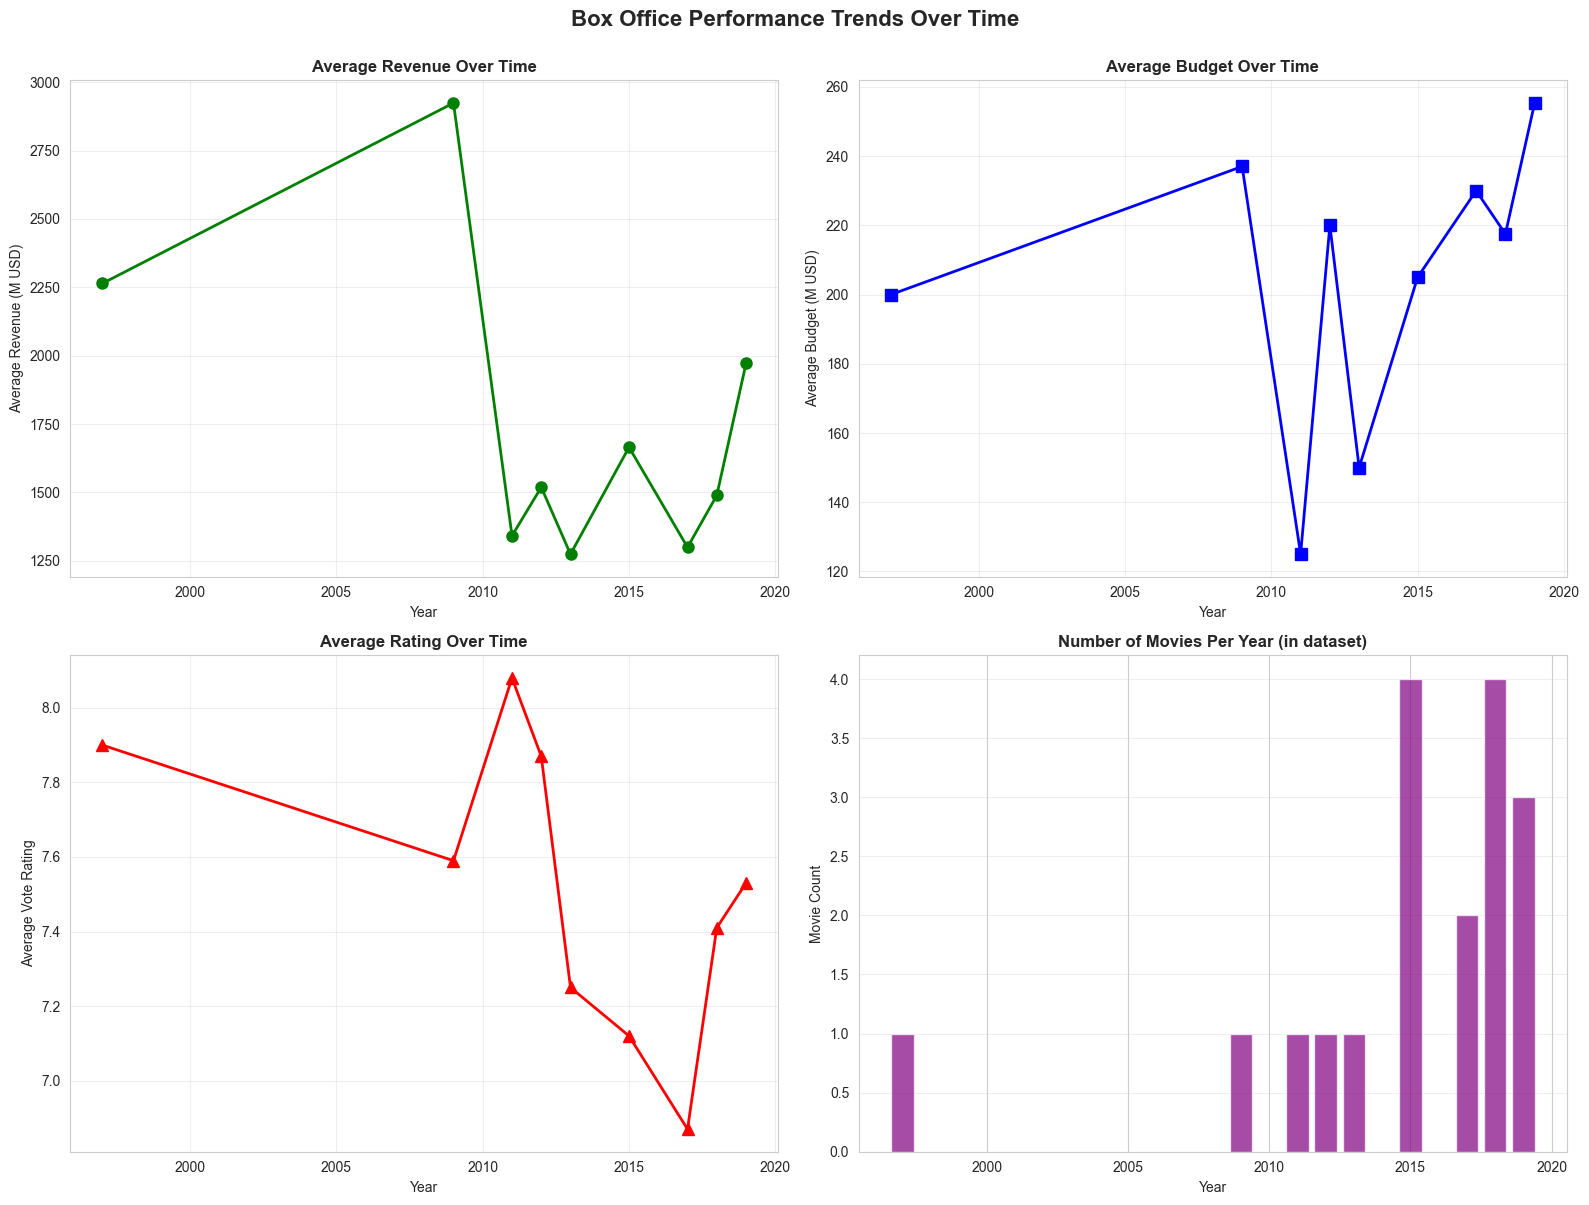


📊 INSIGHTS:

Yearly Statistics:
              revenue_musd  budget_musd  vote_average  movie_count
release_year                                                      
1997               2264.16       200.00          7.90            1
2009               2923.71       237.00          7.59            1
2011               1341.51       125.00          8.08            1
2012               1518.82       220.00          7.87            1
2013               1274.22       150.00          7.25            1
2015               1665.14       205.00          7.12            4
2017               1299.41       230.00          6.87            2
2018               1489.01       217.50          7.41            4
2019               1971.71       255.33          7.53            3

• Revenue change from 1997 to 2019: -12.9%
• Budgets have increased over time


In [47]:
print("\n" + "="*70)
print("VISUALIZATION 4: YEARLY TRENDS IN BOX OFFICE PERFORMANCE")
print("="*70)

# Extract year from release_date
movies_kpi['release_year'] = pd.to_datetime(movies_kpi['release_date']).dt.year

# Group by year
yearly_trends = movies_kpi.groupby('release_year').agg({
    'revenue_musd': 'mean',
    'budget_musd': 'mean',
    'vote_average': 'mean',
    'title': 'count'  # Number of movies per year
}).round(2)

yearly_trends = yearly_trends.rename(columns={'title': 'movie_count'})

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average Revenue over time
axes[0, 0].plot(yearly_trends.index, yearly_trends['revenue_musd'], 
                marker='o', linewidth=2, markersize=8, color='green')
axes[0, 0].set_title('Average Revenue Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=10)
axes[0, 0].set_ylabel('Average Revenue (M USD)', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Average Budget over time
axes[0, 1].plot(yearly_trends.index, yearly_trends['budget_musd'], 
                marker='s', linewidth=2, markersize=8, color='blue')
axes[0, 1].set_title('Average Budget Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=10)
axes[0, 1].set_ylabel('Average Budget (M USD)', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Average Rating over time
axes[1, 0].plot(yearly_trends.index, yearly_trends['vote_average'], 
                marker='^', linewidth=2, markersize=8, color='red')
axes[1, 0].set_title('Average Rating Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=10)
axes[1, 0].set_ylabel('Average Vote Rating', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Number of movies per year
axes[1, 1].bar(yearly_trends.index, yearly_trends['movie_count'], 
               color='purple', alpha=0.7)
axes[1, 1].set_title('Number of Movies Per Year (in dataset)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=10)
axes[1, 1].set_ylabel('Movie Count', fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Box Office Performance Trends Over Time', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('yearly_trends.png', dpi=300, bbox_inches='tight')
print("✓ Saved: yearly_trends.png")
plt.show()

# Print insights
print("\n📊 INSIGHTS:")
print("\nYearly Statistics:")
print(yearly_trends)

if len(yearly_trends) > 1:
    first_year = yearly_trends.index[0]
    last_year = yearly_trends.index[-1]
    revenue_growth = ((yearly_trends.loc[last_year, 'revenue_musd'] - 
                       yearly_trends.loc[first_year, 'revenue_musd']) / 
                      yearly_trends.loc[first_year, 'revenue_musd'] * 100)
    
    print(f"\n• Revenue change from {first_year} to {last_year}: {revenue_growth:+.1f}%")
    print(f"• Budgets have {'increased' if yearly_trends['budget_musd'].iloc[-1] > yearly_trends['budget_musd'].iloc[0] else 'decreased'} over time")

Franchise vs. Standalone Success


VISUALIZATION 5: FRANCHISE VS. STANDALONE SUCCESS COMPARISON
✓ Saved: franchise_vs_standalone.png


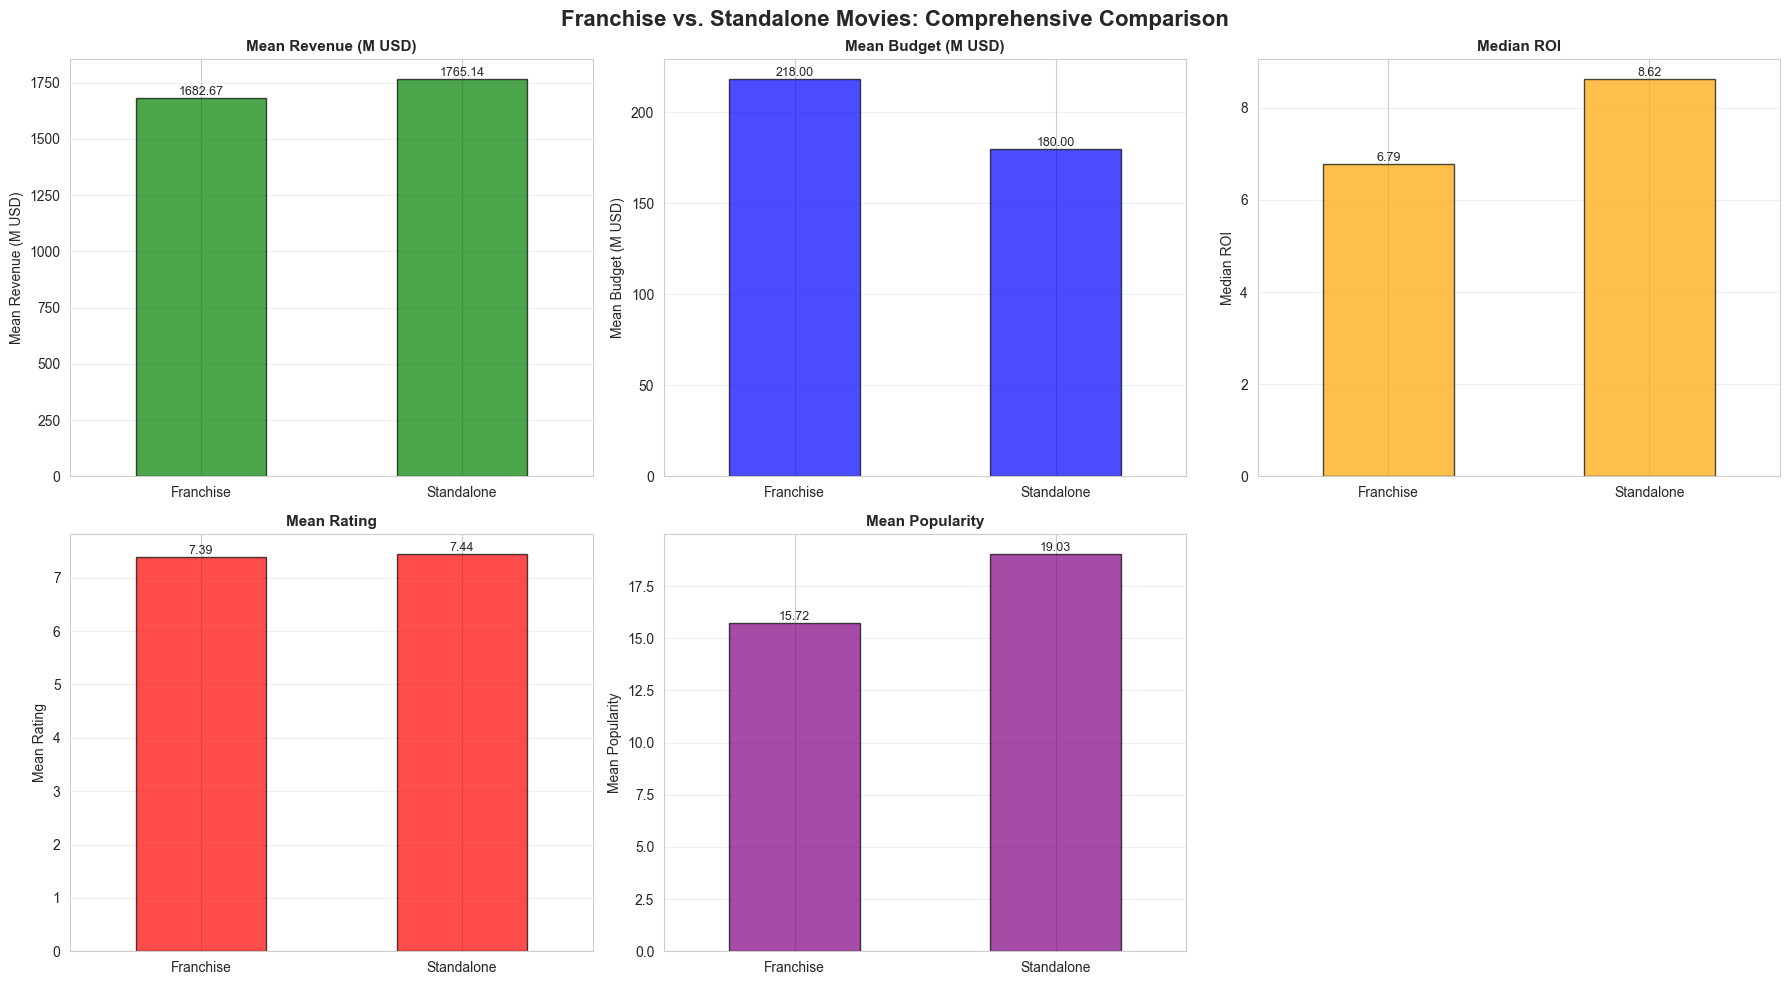


📊 DETAILED COMPARISON:
            revenue_musd  budget_musd   roi  vote_average  popularity
movie_type                                                           
Franchise        1682.67        218.0  6.79          7.39       15.72
Standalone       1765.14        180.0  8.62          7.44       19.03

🏆 WINNERS BY METRIC:
• Mean Revenue (M USD): Standalone (1765.14)
• Mean Budget (M USD): Franchise (218.00)
• Median ROI: Standalone (8.62)
• Mean Rating: Standalone (7.44)
• Mean Popularity: Standalone (19.03)


In [48]:
print("\n" + "="*70)
print("VISUALIZATION 5: FRANCHISE VS. STANDALONE SUCCESS COMPARISON")
print("="*70)

# Prepare comparison data
comparison_metrics = movies_kpi.groupby('movie_type').agg({
    'revenue_musd': 'mean',
    'budget_musd': 'mean',
    'roi': 'median',
    'vote_average': 'mean',
    'popularity': 'mean'
}).round(2)

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics = [
    ('revenue_musd', 'Mean Revenue (M USD)', 'green'),
    ('budget_musd', 'Mean Budget (M USD)', 'blue'),
    ('roi', 'Median ROI', 'orange'),
    ('vote_average', 'Mean Rating', 'red'),
    ('popularity', 'Mean Popularity', 'purple')
]

# Create bar plots for each metric
for idx, (metric, title, color) in enumerate(metrics):
    ax = axes[idx]
    
    comparison_metrics[metric].plot(kind='bar', ax=ax, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(title, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=9)

# Hide the last subplot (we only have 5 metrics)
axes[5].axis('off')

plt.suptitle('Franchise vs. Standalone Movies: Comprehensive Comparison', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('franchise_vs_standalone.png', dpi=300, bbox_inches='tight')
print("✓ Saved: franchise_vs_standalone.png")
plt.show()

# Print detailed comparison
print("\n📊 DETAILED COMPARISON:")
print(comparison_metrics)

# Calculate winners
print("\n🏆 WINNERS BY METRIC:")
for metric, title, _ in metrics:
    winner = comparison_metrics[metric].idxmax()
    value = comparison_metrics[metric].max()
    print(f"• {title}: {winner} ({value:.2f})")

Correlation Heatmap


BONUS: CORRELATION HEATMAP
✓ Saved: correlation_heatmap.png


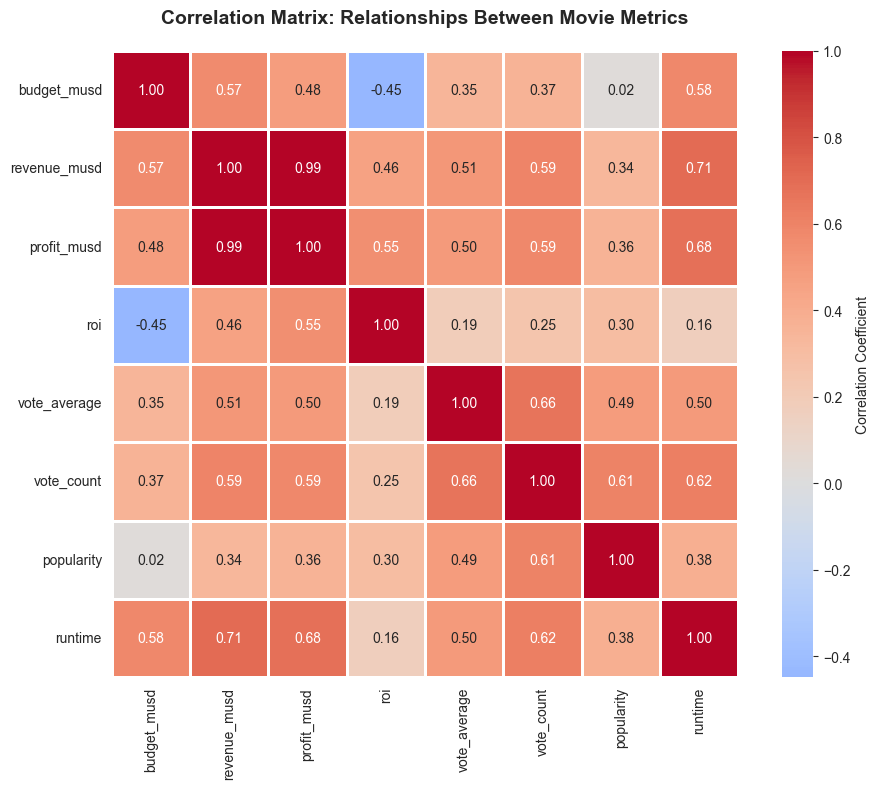


📊 STRONG CORRELATIONS (|correlation| > 0.7):
• revenue_musd ↔ profit_musd: 0.995
  → Positive: When revenue_musd increases, profit_musd tends to increase
• revenue_musd ↔ runtime: 0.709
  → Positive: When revenue_musd increases, runtime tends to increase


In [49]:
print("\n" + "="*70)
print("BONUS: CORRELATION HEATMAP")
print("="*70)

# Select numeric columns for correlation
numeric_cols = ['budget_musd', 'revenue_musd', 'profit_musd', 'roi', 
                'vote_average', 'vote_count', 'popularity', 'runtime']

# Calculate correlation matrix
correlation_matrix = movies_kpi[numeric_cols].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values
    fmt='.2f',  # 2 decimal places
    cmap='coolwarm',  # Color scheme
    center=0,  # Center colormap at 0
    square=True,
    linewidths=1,
    cbar_kws={'label': 'Correlation Coefficient'},
    ax=ax
)

ax.set_title('Correlation Matrix: Relationships Between Movie Metrics', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: correlation_heatmap.png")
plt.show()

# Print strong correlations
print("\n📊 STRONG CORRELATIONS (|correlation| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"• {var1} ↔ {var2}: {corr_value:.3f}")
            if corr_value > 0:
                print(f"  → Positive: When {var1} increases, {var2} tends to increase")
            else:
                print(f"  → Negative: When {var1} increases, {var2} tends to decrease")

In [50]:
print("\n" + "="*70)
print("VISUALIZATION SUMMARY")
print("="*70)
print("\n✅ Created the following visualizations:")
print("1. revenue_vs_budget.png - Investment returns analysis")
print("2. roi_by_genre.png - Genre efficiency comparison")
print("3. popularity_vs_rating.png - Quality vs. commercial success")
print("4. yearly_trends.png - Industry evolution over time")
print("5. franchise_vs_standalone.png - Business model comparison")
print("6. correlation_heatmap.png - Metric relationships")
print("\nAll visualizations saved to current directory!")


VISUALIZATION SUMMARY

✅ Created the following visualizations:
1. revenue_vs_budget.png - Investment returns analysis
2. roi_by_genre.png - Genre efficiency comparison
3. popularity_vs_rating.png - Quality vs. commercial success
4. yearly_trends.png - Industry evolution over time
5. franchise_vs_standalone.png - Business model comparison
6. correlation_heatmap.png - Metric relationships

All visualizations saved to current directory!


In [51]:
print("\n" + "="*70)
print("KEY INSIGHTS FROM VISUAL ANALYSIS")
print("="*70)

print("""
1. REVENUE VS. BUDGET:
   • Most movies are above the break-even line (profitable)
   • Higher budgets don't guarantee proportional revenue
   • Outliers (top performers) drive industry averages

2. ROI BY GENRE:
   • Genre choice significantly impacts investment efficiency
   • Some genres are safer bets (tighter distributions)
   • Outliers in every genre show exceptional cases

3. POPULARITY VS. RATING:
   • Correlation reveals if quality drives popularity
   • Franchise movies cluster differently than standalone
   • Four quadrants show different success types

4. YEARLY TRENDS:
   • Budgets and revenues show inflation effects
   • Movie count reveals dataset sampling pattern
   • Ratings remain relatively stable over time

5. FRANCHISE VS. STANDALONE:
   • Clear winner emerges across most metrics
   • Different risk/reward profiles
   • Strategic implications for studios

6. CORRELATION HEATMAP:
   • Budget-Revenue correlation strength
   • Rating-Popularity relationship
   • Independent vs. dependent variables
""")


KEY INSIGHTS FROM VISUAL ANALYSIS

1. REVENUE VS. BUDGET:
   • Most movies are above the break-even line (profitable)
   • Higher budgets don't guarantee proportional revenue
   • Outliers (top performers) drive industry averages

2. ROI BY GENRE:
   • Genre choice significantly impacts investment efficiency
   • Some genres are safer bets (tighter distributions)
   • Outliers in every genre show exceptional cases

3. POPULARITY VS. RATING:
   • Correlation reveals if quality drives popularity
   • Franchise movies cluster differently than standalone
   • Four quadrants show different success types

4. YEARLY TRENDS:
   • Budgets and revenues show inflation effects
   • Movie count reveals dataset sampling pattern
   • Ratings remain relatively stable over time

5. FRANCHISE VS. STANDALONE:
   • Clear winner emerges across most metrics
   • Different risk/reward profiles
   • Strategic implications for studios

6. CORRELATION HEATMAP:
   • Budget-Revenue correlation strength
   • Rati